## Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//afarbin/DATA1401-Spring-2020/blob/master/Labs/Lab-4/Lab-4.ipynb)

In this lab we will become familiar with distributions, histograms, and functional programming. 


### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [46]:
import random
x=random.random()
print ("The Value of x is", x)

The Value of x is 0.7623145433892383


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [47]:
# Skeleton
def generate_uniform(N,x_min,x_max):
    out = []
    for i in range(N):
        out.append(random.randint(x_min,x_max))
    return out

In [48]:
generate_uniform(10,0,10)

[2, 4, 10, 9, 3, 1, 10, 2, 10, 9]

In [49]:
# Test your solution here
data=generate_uniform(10,0,10)
print(data)
print ("Data Type:", type(data))
print ("Data Length:", len(data))
if len(data)>0: 
    print ("Type of Data Contents:", type(data[0]))
    print ("Data Minimum:", min(data))
    print ("Data Maximum:", max(data))

[2, 3, 1, 9, 10, 9, 2, 7, 7, 8]
Data Type: <class 'list'>
Data Length: 10
Type of Data Contents: <class 'int'>
Data Minimum: 1
Data Maximum: 10


*Exercise 2a:* 
Write a function that computes the mean of values in a list.

In [50]:
# Skeleton
def mean(data):
    m=0
    for i in data:
        m=m+i/len(data)
    return m

In [51]:
# Test your solution here
#data =(2,4,6,8,10)
print ("Mean of Data:", mean(data))

Mean of Data: 5.8


*Exercise 2b:* 
Write a function that computes the variance of values in a list.

In [52]:
# Skeleton
def variance(data):
    v=0.
    for i in data:
        v=v +(i-mean(data))**2/len(data)
    return v

In [53]:
# Test your solution here
#data=(2,4,6,8,10)
print ("Variance of Data:", variance(data))

Variance of Data: 10.56


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+i*2*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [54]:
# Solution
def histogram(x,n_bins=10,x_min=None,x_max=None):
    x_min=min(x)
    x_max=max(x)
    bin_size=(x_max-x_min)/n_bins
    hist=[0]*n_bins
    for value in x:
        for i in range(n_bins):
            if x_min+i*bin_size<= value <=x_min+(i+1)*bin_size:
                hist[i]+=1
    
    bin_edges=[]
    for edge in range(n_bins+1):
        bin_edges.append(x_min+edge*bin_size)
    bin_edges=[round(z,2) for z in bin_edges]
    return hist,bin_edges

In [55]:
# Test your solution here
h,b=histogram(data,10)
print(h)

[1, 2, 1, 0, 0, 0, 2, 1, 2, 1]


*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin. 

In [56]:
# Solution
def draw_histogram(x,n_bins,x_min=None,x_max=None,character="#",max_character_per_line=20):
    x_min=min(x)
    x_max=max(x)
    bin_size=(x_max-x_min)/n_bins
    hist=[0]*n_bins
    for value in x:
        for i in range(n_bins):
            if x_min+i*bin_size<= value <=x_min+(i+1)*bin_size:
                hist[i]+=1
    
    bin_edges=[]
    for edge in range(n_bins+1):
        bin_edges.append(x_min+edge*bin_size)
    bin_edges=[round(z,2) for z in bin_edges]
    
    for i in range(len(hist)):
        print("[",bin_edges[i],",",bin_edges[i+1],"]",":",int(hist[i])*character)

    return hist,bin_edges

In [57]:
# Test your solution here
print(data)
draw_histogram(data,10)

[2, 3, 1, 9, 10, 9, 2, 7, 7, 8]
[ 1.0 , 1.9 ] : #
[ 1.9 , 2.8 ] : ##
[ 2.8 , 3.7 ] : #
[ 3.7 , 4.6 ] : 
[ 4.6 , 5.5 ] : 
[ 5.5 , 6.4 ] : 
[ 6.4 , 7.3 ] : ##
[ 7.3 , 8.2 ] : #
[ 8.2 , 9.1 ] : ##
[ 9.1 , 10.0 ] : #


([1, 2, 1, 0, 0, 0, 2, 1, 2, 1],
 [1.0, 1.9, 2.8, 3.7, 4.6, 5.5, 6.4, 7.3, 8.2, 9.1, 10.0])

## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [58]:
# Solution
def where(mylist,myfunction):
    out=[]
    for i,val in enumerate(mylist): 
        if myfunction(val):
            out.append(i)
    return out

In [59]:
# Test your solution here
print(data)
where(data,lambda x:x>0.5)

[2, 3, 1, 9, 10, 9, 2, 7, 7, 8]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

*Exercise 6:* The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [60]:
def inrange(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=inrange(0,10)
F2=inrange(10,20)

# Test of in_range
print (F1(0), F1(1), F1(10), F1(15), F1(20))
print (F2(0), F2(1), F2(10), F2(15), F2(20))

print("Number of Entries passing F1:", len(where(data,F1)))
print("Number of Entries passing F2:", len(where(data,F2)))

True True False False False
False False True True False
Number of Entries passing F1: 9
Number of Entries passing F2: 1


In [61]:
### BEGIN SOLUTION

def even(x):
    return x%2==0

def odd(x):
    return x%2!=0

def greaterthan(y):
    def func(x):
        return x>y
    return func

def lessthan(y):
    def func(x):
        return x<y
    return func

def equal(y):
    def func(x):
        return x==y
    return func

def divisibleby(y):
    def func(x):
        return x%y==0
    return func



In [62]:
# Test your solution

d=list(range(50))

print ("Number of Entries passing even:", len(where(d,even)))
print ("Number of Entries passing odd:", len(where(d,odd)))
print ("Number of Entries passing greater than 10:", len(where(d,greaterthan(10))))
print ("Number of Entries passing less than 10:", len(where(d,lessthan(10))))
print ("Number of Entries passing equal to 10:", len(where(d,equal(10))))
print ("Number of Entries passing divisible by 10:", len(where(d,divisibleby(10))))

Number of Entries passing even: 25
Number of Entries passing odd: 25
Number of Entries passing greater than 10: 39
Number of Entries passing less than 10: 10
Number of Entries passing equal to 10: 1
Number of Entries passing divisible by 10: 5


*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

In [63]:
### BEGIN SOLUTION

even=lambda x:x%2==0

odd=lambda x: x%2!=0

#greaterthan=lambda x,y: x>y
greaterthan=lambda x: x>10

#lessthan=lambda x,y: x<y
lessthan=lambda x: x<10

#equal=lambda x,y:x==y
equal=lambda x:x==10

#divisibleby=lambda x,y:x%y==0
divisibleby=lambda x:x%10==0
    
### END SOLUTION

In [64]:
# Test your solution

d=list(range(50))

print ("Number of Entries passing even:", len(where(d,even)))
print ("Number of Entries passing odd:", len(where(d,odd)))
print ("Number of Entries passing greater than 10:", len(where(d,greaterthan)))
print ("Number of Entries passing less than 10:", len(where(d,lessthan)))
print ("Number of Entries passing equal to 10:", len(where(d,equal)))
print ("Number of Entries passing divisible by 10:", len(where(d,divisibleby)))

Number of Entries passing even: 25
Number of Entries passing odd: 25
Number of Entries passing greater than 10: 39
Number of Entries passing less than 10: 10
Number of Entries passing equal to 10: 1
Number of Entries passing divisible by 10: 5


## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  

In [125]:

def arange(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out=list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    out.append(x_max)    
    return out

def generate_function(func,x_min,x_max,N=100):
    out=list()
    x_scan=arange(x_min,x_max,100)
    p_scan=list(map(func,x_scan))
    p_min=min(p_scan)
    p_max=max(p_scan)
    
    while len(out)<N:
        x=x_min + (x_min-x_max)*random.random()
        p=p_min + (p_min-p_max)*random.random()
        
        if p<=func(x):
            out.append(x)
    return out

In [84]:
import random
def generate_function(func,x_min,x_max,N=100):
    out=[]
 
    while len(out)<N:
        x=random.randint(x_min,x_max)
        p=random.randint(x_min,x_max)
        if p<=func(x):
            out.append(x)
 
    return out

In [123]:
# A test function
def test_func(x,a=1,b=1):
    return abs(a*x+b)

In [126]:
#test_func(10)
test=generate_function(test_func,0,10)
print(test)

[-8.964826139040973, -8.740277005741955, -1.8141039525553382, -1.9153131982349858, -3.0051592897801447, -3.5149074858659457, -8.730650433565646, -6.0354716003379245, -4.0421788896593425, -2.6812729034229967, -4.839254661161131, -4.530297060975518, -7.898071323903709, -2.933944345921, -0.0471006612791125, -2.593282129643497, -9.653776576784773, -2.9304098850436713, -0.7814760922668018, -3.624209505295565, -4.966045676863857, -5.14386358737427, -8.435823735268336, -6.408535185492854, -6.5216655302192805, -3.785696794474914, -7.2417702213413895, -4.9259613081154665, -7.502546619541686, -0.38292529556748556, -1.1197005898281465, -7.081600742834721, -2.2731504995581653, -0.2974181084409855, -8.999018800977499, -5.522065709763435, -6.539837207021664, -3.8098560215262167, -4.111548519039933, -7.299121546114914, -1.006337825473782, -8.220648114645972, -9.857912176129036, -5.007255494045053, -0.4934950540760952, -5.032451530657498, -0.9124803651617552, -4.823988174450361, -6.52171784649331, -8.

(array([12.,  6., 10., 12., 11., 14.,  8.,  9.,  9.,  9.]),
 array([-9.78581198, -8.81880424, -7.85179649, -6.88478875, -5.917781  ,
        -4.95077326, -3.98376551, -3.01675777, -2.04975003, -1.08274228,
        -0.11573454]),
 <a list of 10 Patch objects>)

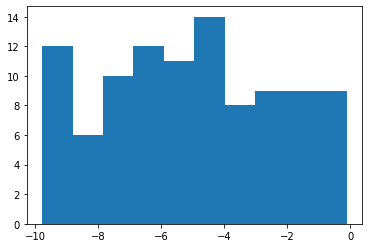

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(generate_function(test_func,0,10))

*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

In [88]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

In [89]:
test2=generate_function(g1,0,10)
print(test2)
#test3=generate_function(g2,0,10)
#print(test3)

[9, 7, 6, 9, 0, 7, 0, 2, 0, 9, 7, 10, 8, 4, 5, 4, 0, 7, 4, 4, 3, 8, 9, 1, 1, 4, 3, 10, 1, 2, 0, 5, 5, 10, 2, 4, 3, 0, 5, 5, 10, 7, 10, 4, 6, 2, 6, 2, 2, 5, 9, 4, 6, 10, 4, 7, 10, 5, 5, 10, 3, 7, 0, 7, 0, 4, 0, 6, 1, 3, 6, 9, 9, 2, 3, 3, 5, 6, 6, 8, 4, 3, 8, 6, 5, 1, 8, 6, 5, 7, 7, 3, 4, 4, 1, 0, 2, 3, 1, 3]


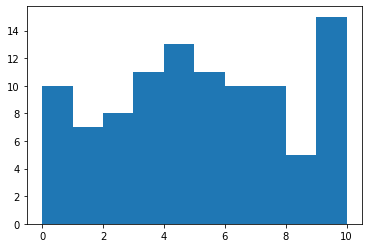

In [136]:
plt.hist(test2)
plt.show()

In [90]:
m=mean(test2)
v=variance(test2)
print(m,v)

4.759999999999999 8.922399999999996


In [91]:
g2=gaussian(5.448275862068969, 9.764565992865645)
result=generate_function(g2,0,10)
print(result)


[2, 2, 3, 1, 8, 8, 0, 0, 10, 4, 3, 10, 2, 1, 3, 5, 6, 5, 7, 2, 5, 0, 4, 8, 5, 2, 3, 4, 8, 5, 1, 7, 0, 5, 3, 7, 2, 1, 5, 6, 8, 10, 6, 2, 4, 8, 8, 0, 3, 10, 10, 6, 7, 4, 8, 9, 9, 8, 6, 0, 3, 5, 8, 3, 8, 0, 9, 9, 2, 0, 10, 7, 4, 10, 3, 3, 10, 3, 4, 3, 0, 8, 2, 1, 6, 2, 0, 7, 9, 0, 3, 10, 9, 2, 2, 5, 5, 6, 0, 0]


In [92]:
m=mean(result)
v=variance(result)
print(m,v)

4.699999999999996 10.230000000000011


*Exercise 9:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [130]:
def integrate(func, x_min, x_max, n_points=1000):
    out = list()
    x_scan=arange(x_min,x_max,100)
    p_scan=list(map(func,x_scan))
    p_min=min(p_scan)
    p_max=max(p_scan)
    
    count=0
    while len(out)<n_points:
        count+=1
        x=x_min+(x_max-x_min)*random.random()
        p=p_min+(p_max-p_min)*random.random()
        
        if p<=func(x):
            out.append(x)
            
    integral = float(len(out))/float(count)
    return integral

In [131]:
integrate(g1, -1, 1, n_points=1000)

0.6269592476489029